# How Good is Your Python?

Here are is some code for the lab 1 self-assessment exercise.


In [1]:

def count_characters(text):
  #if text is a string then len returns the number of characters in a string
    return len(text)


def count_lines(lines):
  #if lines is a list of lines read using readlines then len will return the number of lines
  return len(lines)

def count_words(text):
  #assume that words are delimited by whitespace
  #of course we could use the nltk tokenise function, which will handle punctuation much better!
  words =text.split()
  return len(words)



In [2]:
# to be run on colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
#colab path
#path="/content/drive/MyDrive/AdvNLP/Week1"
#jupyter path
path="/Users/juliewe/Dropbox/teaching/AdvancedNLP/2026/2026_content/week1/lab1/lab1solutions"
filename="text.txt"
filepath=os.path.join(path,filename)

In [5]:

with open(filepath) as instream:
    mytext=instream.readlines()

print(f'The number of lines in {filename} is {count_lines(mytext)}')
    

The number of lines in text.txt is 1


In [6]:
#each line is a string so use count_words to find the number of words in each line and then add up
lengths=[count_words(line) for line in mytext]
print(f'The number of words is {filename} is {sum(lengths)}')


The number of words is text.txt is 6


In [7]:
#similar tactic for characters
charlengths=[count_characters(line) for line in mytext]
print(f'The number of characters is {filename} is {sum(charlengths)}')


The number of characters is text.txt is 24


Average length of word is the the total number of characters divided by the total number of words

In [8]:
print(f'The average length of a word is {sum(charlengths)/sum(lengths)}')

The average length of a word is 4.0


In [9]:
#I am going to store the frequency of each character in a dictionary
letter_frequencies={}
for line in mytext:
  for char in line.lower():
    #for every character that I encounter, look up how many times I have seen it previously, add 1 and store.
    
    letter_frequencies[char]=letter_frequencies.get(char,0)+1

#this is a really useful recipe for sorting a list of tuples (e.g., dictionary key-value pairs).  The number in the lambda function sets which field in the tuple to sort by
ranked_list=sorted(letter_frequencies.items(),key=lambda x:x[1],reverse=True)
print(ranked_list)
print(f'The most frequently occuring letter is {ranked_list[0][0]} which occurs {ranked_list[0][1]} times')

[('t', 5), (' ', 5), ('a', 3), ('h', 2), ('e', 2), ('c', 1), ('s', 1), ('o', 1), ('n', 1), ('m', 1), ('.', 1), ('\n', 1)]
The most frequently occuring letter is t which occurs 5 times


In [10]:
import pandas as pd
#turn the ranked list into a dataframe for further analysis!
df = pd.DataFrame(ranked_list,columns=["letter","frequency"])
df

,letter,frequency
0,t,5
1,,5
2,a,3
3,h,2
4,e,2
5,c,1
6,s,1
7,o,1
8,n,1
9,m,1


<AxesSubplot: xlabel='letter'>

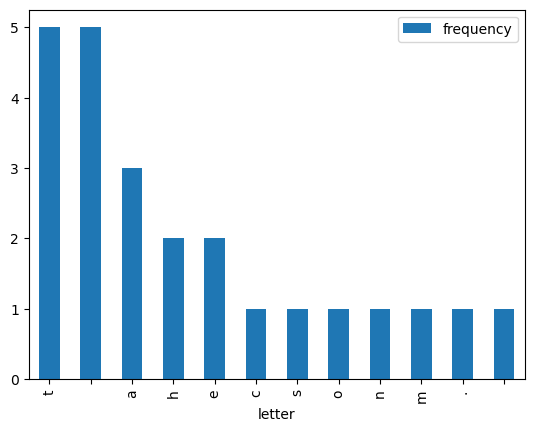

In [11]:
df.plot.bar(x="letter",y="frequency")
#this is actually all characters not just letters - so we should filter nonalphanumeric characters if really just want letters

In [11]:
' '.isalpha()

False

In [12]:
"the".isalpha()

True

<AxesSubplot: xlabel='letter'>

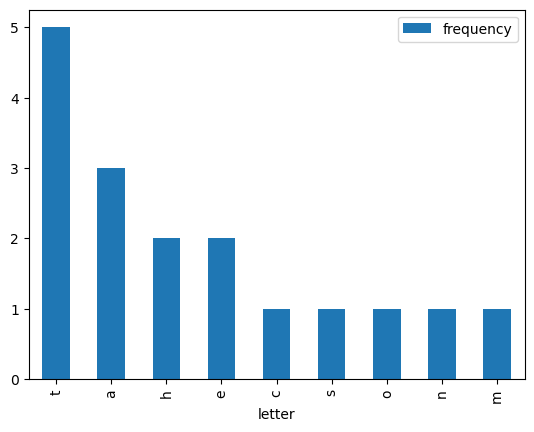

In [13]:
filtered_list=[pair for pair in ranked_list if pair[0].isalpha()]

df2=pd.DataFrame(filtered_list,columns=["letter","frequency"])
df2.plot.bar(x="letter",y="frequency")